# Curse of Dimensionality

In [1]:
# Imports
import numpy as np
import scipy as sp
from sklearn.neighbors import KDTree, KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
plt.style.use('ggplot')

## POV Nr.1
Let's satrt by seeing the effect of dimensionality on the volume of *n-sphere* we saw in the lecture.

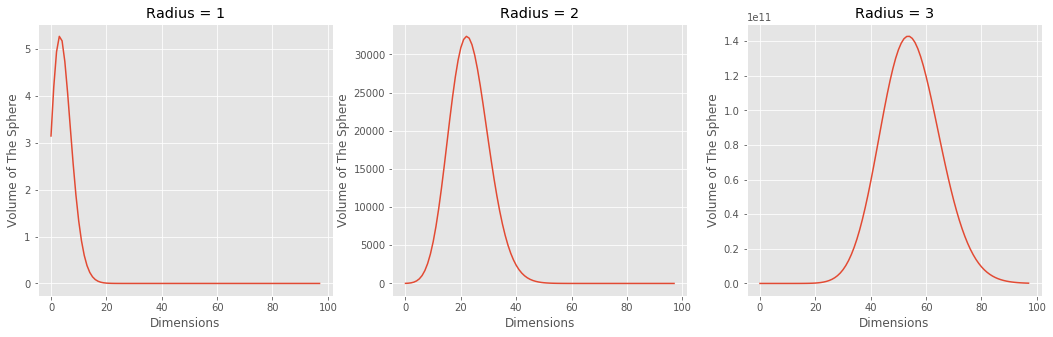

In [2]:
def sph_vol(r,d):
    en = (r**d)*(np.pi**(d/2.))
    den = sp.special.gamma(1+(d/2.))
    return float(en)/float(den)


plt.figure(figsize=(18,5))
for r in [1,2,3]:
    vols = []
    for d in range(2,100):
        vols.append(sph_vol(r,d))
    plt.subplot(1,3,r)
    plt.plot(vols)
    plt.title('Radius = '+str(r))
    plt.xlabel('Dimensions')
    plt.ylabel('Volume of The Sphere')
plt.show()

so obviously, the radius of *n-sphere* changes the zero-point of volume.

## POV Nr.2
Now we inspect the distances inside the data from Nearest Neighbor point of view.

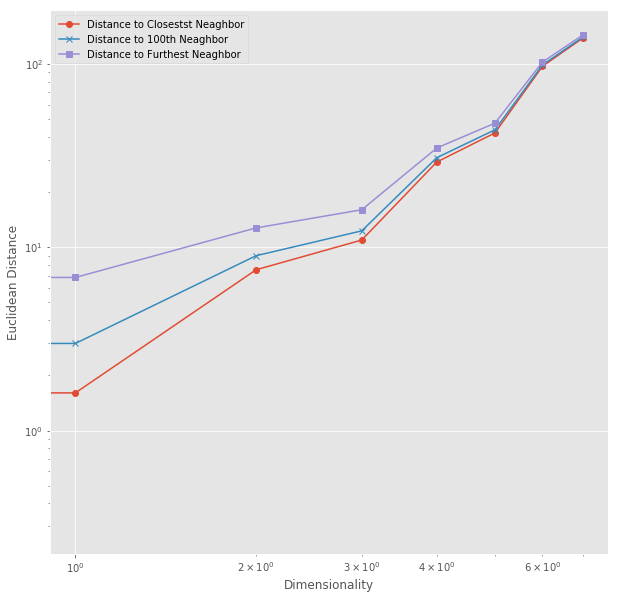

In [3]:
dists = np.zeros((8,3))
ii = 0
for d in [2,10,50,100,500,1000,5000,10000]:
    orig = np.random.randn(1001,d)
    T = KDTree(orig, metric='euclidean') # Google KDTree! what's that?!
    dist, _ = T.query(np.reshape(orig[0,:],(1,-1)), k=1000)
    dists[ii,:] = [dist[0][1],dist[0][100],dist[0][999]]
    ii += 1

plt.figure(figsize=(10,10))
plt.xlabel('Dimensionality')
plt.ylabel('Euclidean Distance')
plt.loglog(dists[:,0],'-o',label='Distance to Closestst Neaghbor')
plt.loglog(dists[:,1],'-x',label='Distance to 100th Neaghbor')
plt.loglog(dists[:,2],'-s',label='Distance to Furthest Neaghbor')
plt.legend()
plt.show()

as seen in the figure, closest and furthest points from any point in the data are in the same distance in high dimensions!

# POV Nr.3
Let's have a look at the distribution of distances inside the data i.e. histogram of pairwise distances between points. 

we have 200 well-separated gaussian points in 2 point clouds.
Let's add some dimensions to see the effect of high-dimensionality.



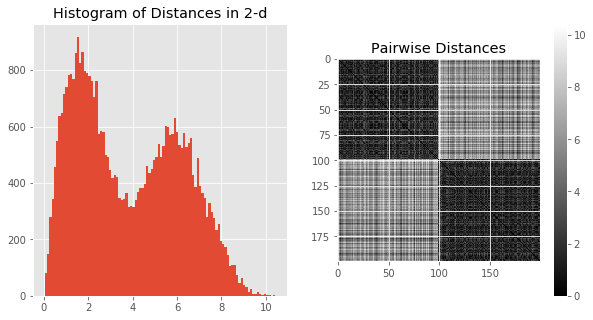

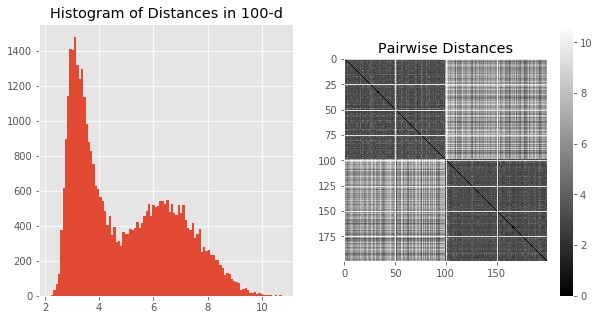

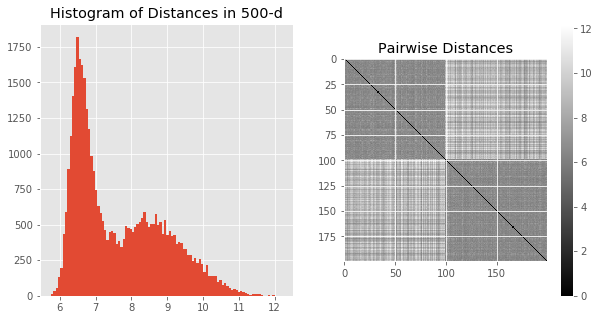

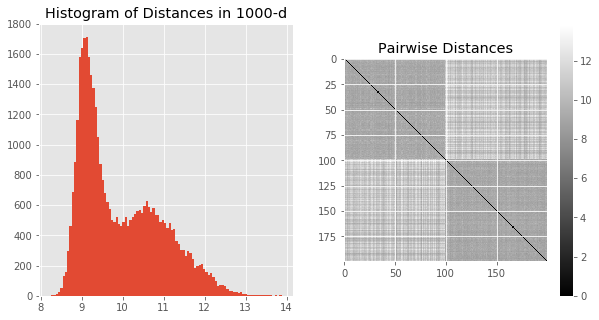

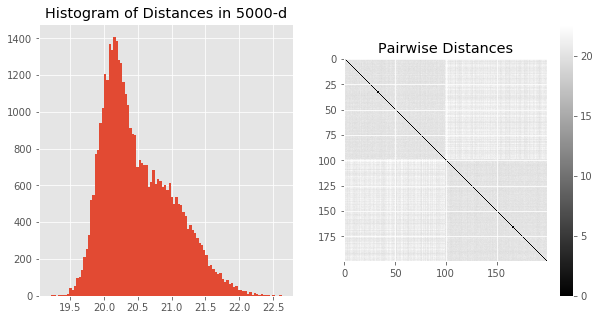

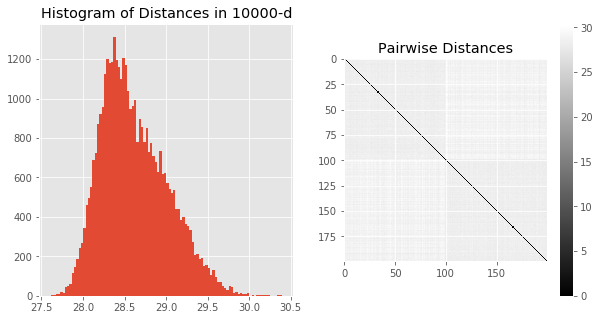

In [4]:
# Creating two well-separated gaussian blobs 

orig = np.concatenate([np.random.randn(100,2)-2,np.random.randn(100,2)+2])
labels = np.array(100*[0] + 100*[1])
print("we have 200 well-separated gaussian points in 2 point clouds.\nLet's add some dimensions to see the effect of high-dimensionality.\n")

for d in [2,100,500,1000,5000,10000]:
    data = np.concatenate([orig,.2*np.random.randn(200,d-2)],axis=1)
    dist = euclidean_distances(data, data)
    hist_vals = sorted(dist.ravel().tolist())[dist.shape[0]::]
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(hist_vals,bins=100)
    plt.title('Histogram of Distances in '+str(d)+'-d')
    plt.subplot(1,2,2)
    plt.imshow(dist,cmap='gray')
    plt.title('Pairwise Distances')
    plt.colorbar()
    plt.show()


### Take-home messages:
1. The range (max - min) of pairwise distances becomes smaller and smaller. (in 2-d the range is between 0 and 10)
2. But the magnitude of distances become larger and larger. (in 10k-d it the range is between 27.5 and 30.5)
3. It means data points spread on equidistant locations from each other but not close to each other in the center (ow the distances would get smaller), rather they locate far from each other **on the surface of this *n-dimensional* sphere**! 
4. Histogram changes from a mixture of 2 gaussian to 1 gaussian. The distance between two blobs is not clear anymore. Data points become almost **equidistant** from eachother.

## POV Nr.4
Finally, we inspect the high-dimensionality according to learning capabilities. In this setting, we make 4 separated classes of points each of which uniformly distributed inside a square. They we add very low variance noise as new features. Please note that this very low variance gaussian noise does not disturb the separability of classes and only adds volume to them *(imagine you add a gaussian noise to the initial arrangement of our data, seen in the plot below. How does it change?)*

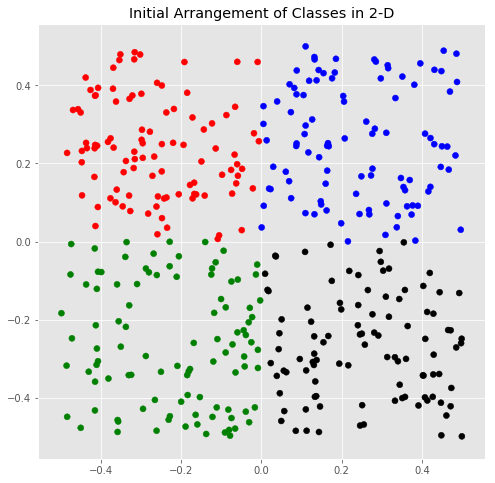

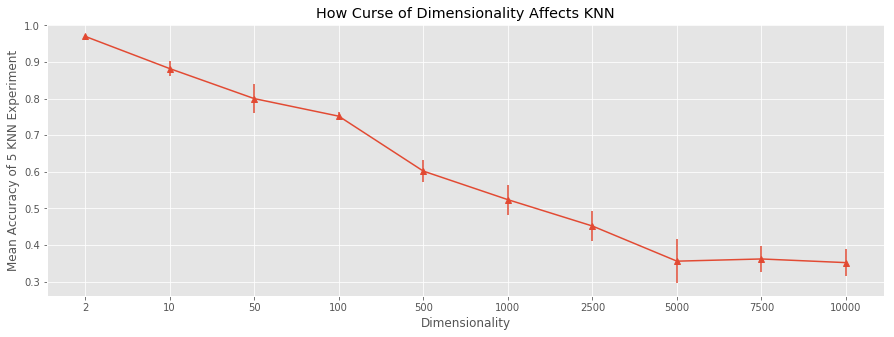

In [5]:
train_orig = np.concatenate([.5*np.random.uniform(low=[-1,0],high=[0,1],size=(100,2)),
                       .5*np.random.uniform(low=[0,0],high=[1,1],size=(100,2)),
                       .5*np.random.uniform(low=[-1,-1],high=[0,0],size=(100,2)),
                       .5*np.random.uniform(low=[0,-1],high=[1,0],size=(100,2))])
train_labels = 100*[0]+100*[1]+100*[2]+100*[3]

clrs = {0:'r',1:'b',2:'g',3:'k'}
plt.figure(figsize=(8,8))
plt.scatter(train_orig[:,0],train_orig[:,1],c = [clrs[ii] for ii in train_labels])
plt.title('Initial Arrangement of Classes in 2-D')
plt.show()


test_orig = np.concatenate([.5*np.random.uniform(low=[-1,0],high=[0,1],size=(25,2)),
                           .5*np.random.uniform(low=[0,0],high=[1,1],size=(25,2)),
                           .5*np.random.uniform(low=[-1,-1],high=[0,0],size=(25,2)),
                           .5*np.random.uniform(low=[0,-1],high=[1,0],size=(25,2))])
test_labels = 25*[0]+25*[1]+25*[2]+25*[3]

tmp_mean = []
tmp_std = []
dims = [2,10,50,100,500,1000,2500,5000,7500,10000]
for d in dims:
    tmp = []
    for ii in range(5):
        train = np.hstack([train_orig,.1*np.random.randn(400,d-2)])
        test = np.hstack([test_orig,.1*np.random.randn(100,d-2)])   
        neigh = KNeighborsClassifier(n_neighbors=3)
        neigh.fit(train,train_labels)
        tmp.append(neigh.score(test,test_labels))
    tmp_mean.append(np.mean(tmp))
    tmp_std.append(np.std(tmp))
plt.figure(figsize=(15,5))
plt.title('How Curse of Dimensionality Affects KNN')
plt.xlabel('Dimensionality')
plt.ylabel('Mean Accuracy of 5 KNN Experiment')
plt.errorbar([ii for ii in range(10)], tmp_mean, tmp_std, marker='^')
plt.xticks(np.arange(10), (str(dim) for dim in dims))
plt.show()